## Working with tabular data in Python

While the first and session focussed on **unstructered**, textual, data, we now turn to working with **structured and semi-structured** information in Python. 

One of the crucial expressions we covered previously was the variable assignment.

In [ ]:
x = 2

Also we learned that Python objects have a `type`.

In [ ]:
type(x)

But we can do more than just playing around with numbers and strings. We can easily load a **table** (structured information) into our Python NoteBook.

Structured data comes often as a CSV table. CSV stands for Comma Separated Values: a table in which, on each row, the cells are separated by commas.

Below is an example of a CSV table, with columns A,B,C and rows 1 to 3:

``
,A,B,C
1,0,1,1
2,1,0,1
3,1,1,1
``

We could open a CSV file using functions from Python's standard libary--assigning the table to a variable with the name `data`.

In [ ]:
# run this cell
data = open('data/immigration_uk.csv').read()

**Exercise**: what is the type of data?

We can inspect the `data` variable and print the first twenty elements using index notation.

In [ ]:
data[:20]

**Question**: what are the first twenty elements of the `data` variable?

As you notice this is not ideal: Python can read the table but does **not recognise the structure**. For sure we can use string methods to split the file into its constituent lines.

**Exercise**: split the table on the '\n' character

**Exercise**: print the first twenty lines

This brings us only so far. What if we would like to access to the first **column**? 

Luckily we do not have to reinvent the wheel ourselves. As said earlier, Python comes with many helpfull external libraries, some specifically tailored to support data science. The ones we use here are called ``pandas`` and ``numpy``. We load this module using `import`.

In [ ]:
# import the pandas library`
import pandas

**Exercise**: try to import numpy.

Pandas and Numpy come with many functions. Some are similar the python, but the structure of the expression is different.

In [ ]:
grades = [10,9,10,8,10,8,10,8,10,8,10,9,10,8,100]

In [ ]:
sum(grades)

In [ ]:
numpy.sum(grades)

One reason to use Numpy instead of the standart library is its **speed**. For various technical reasons, which we will not discuss, Numpy is way faster at handling numerical data. Let's time how fast they calculate the sum of a larger list.

In [ ]:
large_list = range(1,10000000)
large_numpy_list = numpy.array(large_list)

In [ ]:
%time sum(large_list)

In [ ]:
%time numpy.sum(large_numpy_list)

Even though we get the same result, these are two different functions: the first one use standard Python `sum()` function, the second line of code relies on Numpy to calculate the sum.

**Exercise**: Use Numpy to calculate the mean and the median of the `grades` variable. This you can not do with Python (try, but I promise it will raise an NameError).

In [ ]:
# your code here

Because we will be using `pandas` and `numpy` we will use abbreviations to refer to this library.

In [4]:
import pandas as pd

**Exercise**: use the abbreviation `np` for the numpy module.

In [ ]:
# your code here

## Loading and inspecting the data

Using Pandas, we can load a whole CSV Table in just one line, using the `read_csv()` function. 

The data we will be using is sourced (1) from [Political Mashup](http://search.politicalmashup.nl/) (2) [Elections Canada](http://www.elections.ca/content.aspx?section=fin&lang=e). 
- Thile 'electionscanada.csv' records all the donations to political parties in Canada between 2000 and 2004 (a complete, up to date list is available, but too large to keep in memory for many computers).

- The file 'immigration_uk.csv' contains the output of the query "immigration" fired at the Political Mashup database. Political Mashup allows the user to export the query result as a CSV table, with each row recording a mention of the term with limited context and metadata.

Loading a CSV table in Python can easily become burdensome, but in pandas this can be done in just one line.

In [5]:
data_canada = pd.read_csv('data/electionscanada.csv',header=0,sep=',',encoding='utf-8')

Pandas offers various additional tools to load the data correctly, for example tools that parse the date correctly.

In [9]:
dateparse = lambda x: pd.datetime.strptime(x,'%Y-%m-%d')

# read the CSV file as assign 
df = pd.read_csv('data/immigration_uk.csv',
                       header=0, # specify where the header is located
                       sep=",", # specify the delimiter
                       # additional, ignore for now
                       escapechar=u'\\', # quotes inside the text are escaped
                       parse_dates=['date'], # which column contains dates
                       date_parser = dateparse # how to read dates
                      )


In [ ]:
# to what type do data_canada and df belong?

With these few lines, you managed to lead the whole corpus of query results.

The `.head()` method allows you to inspect the table.

In [ ]:
df.head(3)

**Exercise**: What information does the `df` contain

In [ ]:
# write in Markdown

**Exercise**: print the first 10 rows

In [ ]:
# your code here

**Exercise**: Inspect `data_canada`.

In [ ]:
# your code here

**Exercise**: You can count the number of speeches by wrapping the "len()" function around the "speeches" variable. Try it!

In [ ]:
# your code here

To know the dimensions of the data set (number of row and collumns) print the `.shape` attribute

In [ ]:
print(df.shape)

**Exercise**: what is the shape of the data_canada DataFrame?

## Accessing data

DataFrames are a convenient data type to explore tabular information, we can easily access row, columns, as well as individual cells---selecting only those that match certain conditions.

The `.columns` attribute lista all the columns.

In [ ]:
data_canada.columns

**Exercise**: which dataframe has the most collumns?

In [ ]:
len(??) > ?? 

We can retrieve individual columns by the column name. Below, we print the electoral districts where the donations were made.

In [ ]:
data_canada['Electoral District']

To get a particular row, we can use its index.

In [ ]:
data_canada.loc[39916]

To retrieve the cell at this exact position, we use both the row index and column name.

In [ ]:
data_canada.loc[39916,'Electoral District']

We can easily select specific fields of the table using conditional expressions (`<>==`). Run the cell below to understand how they work. 

In [2]:
print('2 > 3 is ',2 > 3)
print('2 < 3 is ',2 < 3)
print('2 >= 3 is ',2 >= 3)
print('2 == 3 is ',2 == 3)
print('2 >= 2 is',2 >= 2)
print('2 == 2 is',2 == 2)

2 > 3 is  False
2 < 3 is  True
2 >= 3 is  False
2 == 3 is  False
2 >= 2 is True
2 == 2 is True


We can apply these conditional operators to our Pandas DataFrame. Below we do two things:
- Select all rows for which the donation exceeded 200\$

- Retrieve the shape of this subset (i.e. how many donations are larger than 200\$)

In [ ]:
data_canada[data_canada['Monetary amount'] > 200].shape

**Exercise**: How many donations exceed 1000\$ in Non-Monetary amount?

To see the different values of a column apply the `.unique` method to the column:

In [ ]:
data_canada['Contributor Province'].unique()

We can now get very specific subsets by combining these boolean expression with the `&` operator. What does the line below do?

**NOTE**: each condition is between parenthesis, to avoid ambiguity.

In [ ]:
data_canada[(data_canada['Contributor Province']  == 'Ontario') & (data_canada['Monetary amount'] > 2000)]

**Exercise**: Select donations to the Liberal Party from British Columbia.

As you noticed, the province data is inconsistent. We could clean to the data or just expand the query. Below we use .isin() to do the latter.

In [ ]:
data_canada[data_canada['Contributor Province'].isin(['Man','MAN'])]

**Exercise**: Select **all** contributions to the Conservative Party from the Ontario province totalling 1000$ or more.

## Exploring Data

Pandas allows you to inspect the data with the help of some descriptive statistics and plots. Run the cell below, otherwise the plots won't appear in the Notebook.

In [7]:
# Run this cell to plot all figures in the Notebook
%matplotlib inline

`describe()` offers you a quick look into the summary statistics of your dataset.

In [ ]:
data_canada.describe()

**Question**: Which columns are not shown in this summary. Can you explain why?

Now applied to parliamentary data.

In [ ]:
df.describe()

**Question**: What do these summary statistics mean?

In Pandas we can easily plot a histogram that shows the distribution of the values. Below is a figure with the distribution of the paragraphs_count variable.

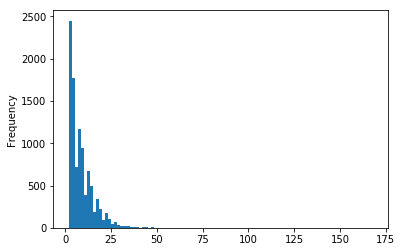

In [10]:
df['paragraphs_count'].plot(kind='hist',bins=100)

**Question**: can you explain in simple terms what the distribution plot actually shows?

In [ ]:
# write your answer here

**Exercise**: plot the distribution of the donations using the same histogram as above.

In [ ]:
??.plot(kind='hist',bins=100)

This plot won't be very readable. You can adjust the range of the x-axis by adjusting the `xlim` argument.

In [ ]:
??.plot(kind='hist',bins=1000,xlim=(0,2000))

**Exercise**: 
- Plot the distribution of donations to the Liberal party.
- Plot the distribution of donations to the Conservative party.


**HINT I**: use the selection methods from above (i.e. select only the rows for which the value of the column 'Political Party' refers to either to the Liberal or the Conservative party).

**HINT II**: use the .unique() method to list all parties in the database.

In [ ]:
# write your code here

In [ ]:
# write your code here

## Inspecting group-level differences with `.groupby()`

To know the differences in donations by party, we can use the `.groupby()` method. Another handy Pandas tool.

In [ ]:
data_canada.groupby('Political Party')['Monetary amount'].sum().plot(kind='bar')

Ok, nice, but what happened here?

The `groupby` function groups the table by the different value of the selected column. The figure below gives a good graphy representation.

<img src="http://i0.wp.com/datapandas.com/wp-content/uploads/2016/09/pandas-powerful-data-analysis-tools-group-by.jpg?resize=600%2C450">

**Exercise**: Compare the 'Non-Monetary amount' to the 'Monetary amount' by party.

In [ ]:
# write your code here

**Exercise**: Plot the donations by "Contributor type".

In [ ]:
# write your code here

**Exercise**: Compare the donations by Political Party for the city of Toronto only (and Vancouver later).

In [ ]:
# write your code here

In [ ]:
# write your code here

## Semi-structured data: Political Mashup

Turning to the Political Mashup data. We want to study the discourse on immigration in the British House of Commons. The DataFrame contains already all mentions retrieved from the PoliticalMashup website.

Let's make a barplot that shows how the speeches are distributed over the different parties

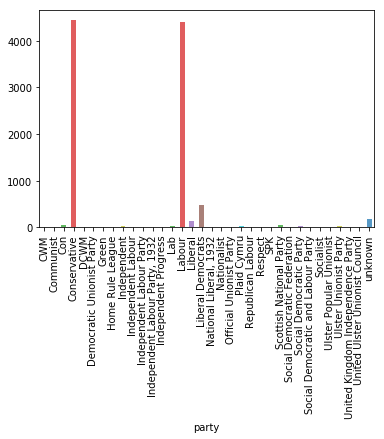

In [11]:
df['party'].groupby(df.party).count().plot(kind='bar',alpha=0.75, rot=90)

This is a very long expression, let's break it down--we'll turn to plotting later. The best way is to read this expression is from left to right.

In [ ]:
df['party']

As you see, `df['party']` just selects the column with the party names

**Exercise**: print the unique values in the `party` column. use the .unique() method

In [ ]:
# write your code here

After grouping the dataframe using the values by the set of values of one specific column (here party), we can compute statistics for each of the different groups listed in the this column. Here we used `sum` which simply sums all the values in the `party` column. This gives us the number of hits by party.

In [ ]:
df['party'].groupby(df.party).count()

Then we just applied the standard `.plot()` method to this table.

In [ ]:
df['party'].groupby(df.party).count().plot(kind='bar',alpha=0.75, rot=90)

**Exercise**: Make a timeline, following the steps below:
- Group the results by date;
- Apply sum to grouped table;
- Plot the results by putting .plot() at the end of the line.

In [ ]:
# write your code here

**Exercise**: group the results by role, but now make a barplot.

In [ ]:
# write your code here

Obviously, Labour and Conservatives are overrepresented. Let's jus discard the other parties. As discussed earlier, Pandas provides different options to select specific rows.

Below we reduce the data to only Labour and Conservative MPs.

In [ ]:
print(df.shape)
df_red = df[df.party.isin(['Labour','Conservative'])]
print(df_red.shape)

The line `df.party.isin(['Labour','Conservative']` says as much as: select all rows for which the value of column party is either equal to 'Labour' or 'Conservative'.

We could also use the `or` notation (with the `|` operator):

In [ ]:
print(df.shape)
df_red = df[(df.party=='Labour') | (df.party=='Conservative')]
print(df_red.shape)

We can also inspect systematic differences between groups by comparing the mean and standard deviation (spread around the mean). Below we look at the average length of the conservative speeches on immigration.

In [ ]:
import numpy as np
m_con = np.mean(df_red[df_red.party=='Conservative'].paragraphs_count)
std_con = np.std(df_red[df_red.party=='Conservative'].paragraphs_count)
print('Mean = ',m_con,'Standard Deviation = ', std_con)

**Exercise**: Print the mean and standard deviation of the variable `paragraphs_count` for the Labour party

In [ ]:
# write your code here

**Exercise**: Print the mean and standard deviation of the Monetary donations for the **Canadian** Liberal and Conservative party

In [ ]:
# write your code here

For closer inspection, you can **sort** the table by a certain column. 

In [ ]:
long_sp = df_red.sort_values('paragraphs_count',ascending=False)
long_sp.head(3)

**Exercise**: Inverse the sorting (from low to high). Tip: In Python the opposite of `False` is `True`.

In [ ]:
# write your code here

**Exercise**: Get the names of the 20 top political donors in Canada.

In [ ]:
# write your code here

## Vader Sentiment Analyzer
The variable paragraphs counts is not the most interesting one, let's have a look at the semtiment values of these mentions of immigration.

For this we use **VADER**.

[from Github](https://github.com/cjhutto/vaderSentiment): VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool.

VADER uses a lexicon (a mapping of words to sentiment values, e.g bad=-1.0, good=+1.0) to compute the sentiment (positivity or negativity) of a text.

In [ ]:
# we need to install the vader lexicon first
import nltk
nltk.download('vader_lexicon')

Now load the VADER Sentiment analyzer

In [ ]:
from nltk.sentiment import vader
analyzer = vader.SentimentIntensityAnalyzer()

Below you can test VADER yourself by changing the value of the ``text`` variable, and running the code block. 

Can you trick the system? Not very easy isn't it?!

In [ ]:
text = "Not interesting!"
sentiments_analysis = analyzer.polarity_scores(text)
print(sentiments_analysis)

We are interested here in the compound, the combination of positive and negative sentiments. We can select this by putting the string 'compound' between square brackets

In [ ]:
sentiments_analysis['compound']

**Exercise**: Select and print the `neg` and `pos` values for two snippets of text

In [12]:
# write your code here

We can make a shorter function that returns the compound sentiment of a given text by creating a `lambda` function.

In [ ]:
# this defines a function that calculates the sentiment and returns the compound sentiment
compound_sentiment = lambda x: analyzer.polarity_scores(x)['compound']
compound_sentiment('Not interesting!')

`compound_sentiment` becomes an abreviation for the longer expression.

**Exercise**: Make a lambda function that computes positive sentiment only.

In [ ]:
# write your code here

Now we can easily calculate the sentiment of each reference to immigration. Here the `apply` function is the powerful Panda's tool: it applies a given function to all the values of on specific column.

In [ ]:
# here we apply this function to each cell in the 'text' column
df_red['compound_sentiment'] = df_red['text'].apply(compound_sentiment)

`df_red['text'].apply(compound_sentiment)` can be almost read as natural language: to all cells in the 'text' column `apply` the compound_sentiment calculater. We assign these values to a new column with the name `compound_sentiment`.

In [ ]:
df_red.head(3)

**Exercise**: Create a new column that records the positive sentiment of a text fragment.

In [ ]:
# write your code here

**Exercise**: Plot the distribution of the sentiment values.

**HINT**: copy the code for creating the histograms

In [ ]:
# write your code here

Now we can sort the table by the sentiment value in each row.

**Exercise**: revisit the sorting the paragraphs_counts above. Now create two variable `negative_speeches` and `positive speeches` by sorting the dataframe on the `compound_sentiment` column and selecting the 10 extreme positive and negative fragments.

In [ ]:
# write your code here

You can print the party and the text with the `itterows()` method:

In [ ]:
for index,row in negative_speeches.iterrows():
    print('Party: ',row.party,'\n','Text: ',row.text)

Now we can compute if Conservatives are more negative about immigration than Labour MPs.

In [ ]:
df_red.groupby('party')['compound_sentiment'].mean()

`groupby` simply groups all the rows by the distint values of the specified column. Here it groups all rows by party. In other words, it temporarily splits the table in 'Labour' and 'Conservative' camps. Then we select the 'compound sentiment' column of each of these subgroups and compute the mean `mean()`.

**Exercise**: Is there a difference between the role a speaker takes up and the sentiment he or she expresses on immigration? 

In [ ]:
# write your code here

We plot the distribution of sentiment scores for different parties, but this largely confirms the simple statistics generated above (this time we use density plot to better compare the two groups):

In [ ]:
df_red[(df_red.party=='Labour')].compound_sentiment.plot(kind='kde')
df_red[(df_red.party=='Conservative')].compound_sentiment.plot(kind='kde')

**Exercise**: Plot distributions for the different roles.

In [ ]:
# write your code here

## Studying changes in content 

The code below allows you to search for specific words in the speeches corpus.

In [ ]:
contains_word = lambda x,w: x.lower().find(w)

In [ ]:
print('lala crime criminal'.find('crime'))
print('lala '.find('crime'))

`find()` returns the start position of the word you are searching for. If the word is not found, it returns -1. 

We can now apply the `contains_word` function to all the speeches and append these results as a new column.

In [ ]:
df_red['contains_crime'] = df_red['text'].apply(contains_word,w='crime')
df_red.head(3)

To select all speeches with the word crime, we take those rows whose value for 'contains_crime' is higher than or equal to zero.

In [ ]:
about_crime = df_red[df_red.contains_crime >= 0]

**Exercise**: How many speeches about crime are there?

In [13]:
# write your code here

Instead of just matching one pattern, we can make a function that looks how often a given list of words appears in a text.

Below is a function that counts how often each word in a list of occurs. A lot is happening here, we dissect the code below.

In [ ]:
from collections import Counter
from nltk import word_tokenize

def count_words_from_list(text,words2count):
    tokens = word_tokenize(text.lower()) # convert string to tokens
    wordfreq = Counter(tokens) # count the tokens, i.e. map tokens to their frequency
    counter = 0
    for w in words2count:
        counter+=wordfreq.get(w,0)
    
    return counter

Let's start with the example text: 'Crime is no fun kids. No, stay of the drugs you little criminals!' and print what the code does at each stage.

In [ ]:
text = 'Crime is no fun kids. No, stay of the drugs you little criminals!'
text_lower = text.lower()
print(text_lower)
tokens = word_tokenize(text_lower)
print(tokens)
wordfreq = Counter(tokens)
print(wordfreq)

After calculating the word frequencies we can count those we are intereted in

In [ ]:
# create a counter variable that keeps track of the word frequncies
counter = 0

words2count = ['crime','criminals']
for w in words2count:
        # add the frequency of word w to the counter, if the word is not found add zero
        counter+=wordfreq.get(w,0)

print(counter)

Let's study how often migration is associated with crime over the years. We look at the words 'crime' and 'criminal' (and their plurals). We apply the `count_words_from_list` function we created earlier to the corpus.

In [ ]:
words2count = ['crime','criminal','crimes','criminals']

In [ ]:
df_red['contains_crime'] = df_red['text'].apply(count_words_from_list,
                                                            words2count=words2count)


**Exercise**: Do Conservatives mention crime more than Labour MPs. You answer this by using the `groupby` function. Revisit the sentiment example:

`df_red.groupby('party')['compound_sentiment'].mean()`

Instead of `mean()` use `count()`

In [ ]:
# write your code here

**Exercise**: Sort the table by how often the fragments mention crime related words. Select and inspect the 20 highest ranked.

We can now plot the the mentions of crime over time:

In [ ]:
df_red.groupby('date')['contains_crime'].sum().plot()

In [ ]:
df_red[df_red.party=='Labour'].groupby('date')['contains_crime'].sum().plot()
df_red[df_red.party=='Conservative'].groupby('date')['contains_crime'].sum().plot()

To plot the result nicely by year:

In [ ]:
df_red[df_red.party=='Labour'].groupby(df_red.date.map(lambda x: x.year))['contains_crime'].sum().plot(color='r')
df_red[df_red.party=='Conservative'].groupby(df_red.date.map(lambda x: x.year))['contains_crime'].sum().plot(color='b')

## DIY I

- go the search.politicalmashup.nl.
- export a query.
- use the aforementioned tools to investigate your data.

In [ ]:
# write your code here